In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import sys
import numpy as np
from tqdm import tqdm
sys.path.append('../../')

In [2]:
%load_ext autoreload
%autoreload 2
from cobi.simulation import CMB
from cobi.simulation import Mask

In [3]:
dir = '/global/cfs/cdirs/sobs/cosmic_birefringence/v0'

In [4]:
cmb_const = CMB(dir,nside=2048,model='iso',beta=0.35,lensing=True,verbose=True)

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected


In [15]:
cmb_const.get_cb_lensed_spectra(beta=0.35,dl=True, dtype='d')

{'tt': array([0.00000000e+00, 0.00000000e+00, 1.02109795e+03, ...,
        1.99579324e-01, 1.99236757e-01, 1.99279553e-01]),
 'te': array([ 0.        ,  0.        ,  2.63500844, ..., -0.00366209,
        -0.00365912, -0.00365615]),
 'ee': array([0.        , 0.        , 0.03108567, ..., 0.00280129, 0.00279914,
        0.00279716]),
 'bb': array([0.00000000e+00, 0.00000000e+00, 6.47147231e-06, ...,
        1.59794559e-03, 1.59686798e-03, 1.59563743e-03]),
 'eb': array([0.00000000e+00, 0.00000000e+00, 3.79779649e-04, ...,
        1.47044991e-05, 1.46915006e-05, 1.46822522e-05]),
 'tb': array([ 0.00000000e+00,  0.00000000e+00,  3.21943029e-02, ...,
        -4.47430799e-05, -4.47068579e-05, -4.46705638e-05])}

In [13]:
m = Mask(dir, nside=1024, select='LATxCOxGALxPS', apo_scale=2, apo_method='C2',gal_cut=70)

Mask : INFO - The given galactic cut value seems in percent of sky and it corresponds to 70% of sky
Mask : INFO - Loading composite mask
Mask : INFO - Upgrading mask LAT resolution
Mask : INFO - Upgrading mask CO resolution
Mask : INFO - Upgrading mask GAL resolution
Mask : INFO - Upgrading mask PS resolution
Mask : INFO - Composite Mask LATxCOxGALxPS: fsky changed 0.93 -> 0.46  
Mask : INFO - Apodizing mask: scale 2: method: C2
Mask : INFO - Apodizing changed the fsky 0.456 -> 0.428


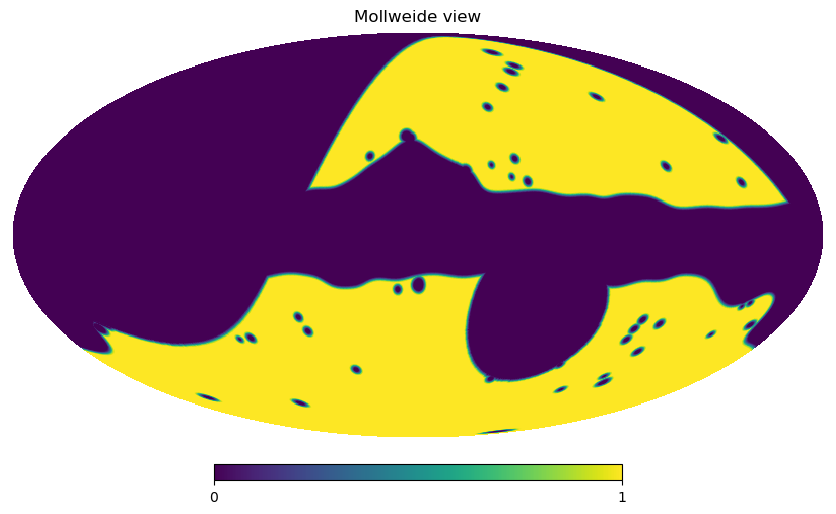

In [14]:
hp.mollview(m.mask)

In [6]:
cmb_const = CMB(dir,nside=2048,model='iso',beta=0.35,lensing=True,verbose=True)
cmb_td1 = CMB(dir,nside=2048,model='iso_td',mass=1.0,lensing=True,verbose=True)
cmb_td1p5 = CMB(dir,nside=2048,model='iso_td',mass=1.5,lensing=True,verbose=True)
cmb_td6p4 = CMB(dir,nside=2048,model='iso_td',mass=6.4,lensing=True,verbose=True)

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(time dep.) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(time dep.) cosmic birefringence model selected


CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(time dep.) cosmic birefringence model selected


In [ ]:
eb_const, eb_td =  [], []
for i in tqdm(range(100)):
    elmc,blmc = hp.map2alm_spin(cmb_const.get_cb_lensed_QU(i),2,lmax=4096)
    elmt,blmt = hp.map2alm_spin(cmb_td.get_cb_lensed_QU(i),2,lmax=4096)
    eb_const.append(hp.alm2cl(elmc,blmc))
    eb_td.append(hp.alm2cl(elmt,blmt))
eb_const = np.array(eb_const)
eb_td = np.array(eb_td)

  0%|          | 0/100 [00:00<?, ?it/s]

  2%|▏         | 2/100 [00:25<20:53, 12.79s/it]

In [7]:
spectra_c = cmb_const.get_cb_lensed_spectra(beta=0.35,dl=False)
spectra_t1 = cmb_td1.get_cb_lensed_mass_spectra(dl=False)
spectra_t1p5 = cmb_td1p5.get_cb_lensed_mass_spectra(dl=False)
spectra_t6p4 = cmb_td6p4.get_cb_lensed_mass_spectra(dl=False)

In [8]:
l = np.arange(4097)
dl = l*(l+1)

Text(0.5, 0, '$\\ell$')

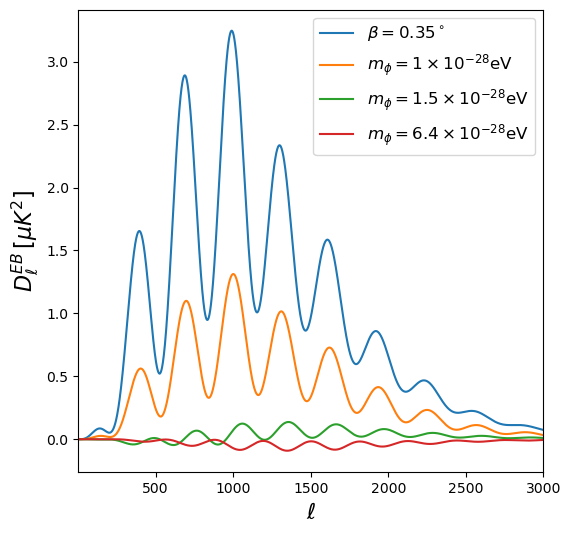

In [33]:
plt.figure(figsize=(6,6))
plt.plot(l,dl*spectra_c['eb'][:4097],label=f'$\\beta=0.35^\circ$')
plt.plot(l,dl*spectra_t1['eb'][:4097],label='$m_\phi = 1 \\times 10^{-28} \\rm eV$')
plt.plot(l,dl*spectra_t1p5['eb'][:4097],label='$m_\phi = 1.5 \\times 10^{-28} \\rm eV$')
plt.plot(l,dl*spectra_t6p4['eb'][:4097],label='$m_\phi = 6.4 \\times 10^{-28} \\rm eV$')
plt.legend(fontsize=12)
plt.xlim(2, 3000)
plt.ylabel(r'$D_\ell^{EB} \, [\mu K^2]$', fontsize=16)
plt.xlabel(r'$\ell$', fontsize=16)
#plt.savefig('eb_theory.pdf', bbox_inches='tight', dpi=300)

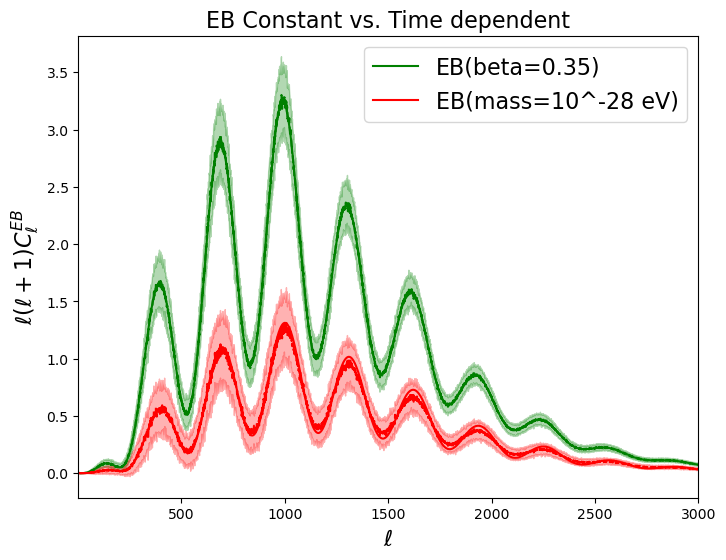

In [58]:
plt.figure(figsize=(8,6))
plt.plot(spectra_c['eb'][:4097]*dl,c= 'g', label='EB(beta=0.35)')
plt.plot(eb_const.mean(axis=0)*dl,c= 'g',ls='--')
plt.fill_between(np.arange(4097),(eb_const.mean(axis=0)-eb_const.std(axis=0))*dl,(eb_const.mean(axis=0)+eb_const.std(axis=0))*dl,color='g',alpha=0.3)
plt.plot(spectra_t['eb'][:4097]*dl,c= 'r', label='EB(mass=10^-28 eV)')
plt.plot(eb_td.mean(axis=0)*dl,c= 'r',ls='--')
plt.fill_between(np.arange(4097),(eb_td.mean(axis=0)-eb_td.std(axis=0))*dl,(eb_td.mean(axis=0)+eb_td.std(axis=0))*dl,color='r',alpha=0.3)
plt.legend(fontsize=16)
plt.xlabel(r'$\ell$',fontsize=16)
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{EB}$',fontsize=16)
plt.xlim(2,3000)
plt.title('EB Constant vs. Time dependent',fontsize=16)